## 머신러닝
# 분류 (Classification) 와 로지스틱회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Iris 데이터 불러오기

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 해결하려는 문제는 무엇인가?
> sepal_length 와 petal_length 속성값을 이용해 setosa/versicolor 품종을 맞추고(예측하고) 싶다

In [7]:
X = iris.data[:100, [0,2]] # 앞에서 부터 차례로 50개씩 setosa, versicolor, virginica 이다
X.shape

(100, 2)

In [8]:
y = iris.target[:100]
y       # 목표값이 0과 1로 되어있는지 확인하자

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'petal length')

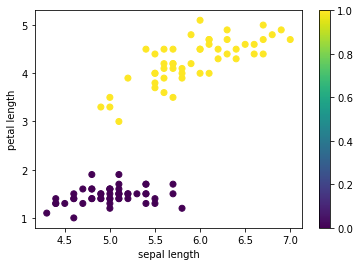

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()
plt.xlabel('sepal length')
plt.ylabel('petal length')

- 새로운 점(꽃)을 찍을 때, 어떤 품종으로 판단할 것인가?
- 분류는 경계선을 그리는 것이다

### 로지스틱회귀(Logistic Regression) 적용
- 품종의 **경계선**을 직선으로 긋는다

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression()

In [11]:
model.fit(X, y)

LogisticRegression()

In [12]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
model.score(X, y) # 옳게 분류한 비율점수

1.0

In [17]:
(y_pred == y).mean()

1.0

### 결과 분석

In [20]:
model.coef_ # 기울기, 가중치

array([[0.3653486 , 2.84071409]])

In [19]:
model.intercept_

array([-9.64260838])

In [22]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

w1, w2, b

(0.3653486007419136, 2.840714093869171, -9.642608384818239)

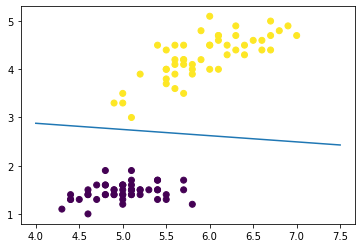

In [24]:
# w1*x + w2*y + b = 0
# => y = -(w1*x+b)/w2

xs = np.array([4, 7.5])
ys = -(w1*xs + b)/w2

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xs, ys)

### 시각화 툴 : mglearn
> pip install mglearn

In [ ]:
! pip install mglearn

In [13]:
import mglearn

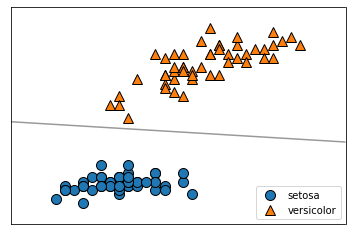

In [28]:
mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['setosa','versicolor'], loc=4)

### 3가지 품종을 분류

In [15]:
X = iris.data[:, [0,2]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

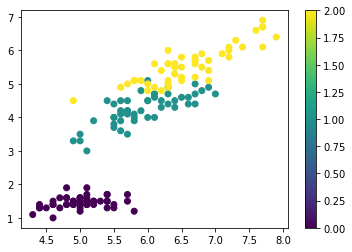

In [31]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [16]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
model.score(X, y)

0.96

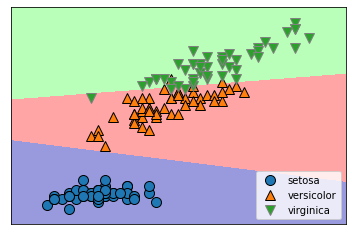

In [38]:
mglearn.plots.plot_2d_classification(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['setosa','versicolor','virginica'], loc=4)

In [39]:
model.coef_

array([[-0.27474561, -3.10539363],
       [ 0.49060283, -0.43408086],
       [-0.21585722,  3.5394745 ]])

In [40]:
model.intercept_

array([ 12.53749025,   1.22176426, -13.75925452])

### 모든 속성을 사용하여 분류

In [20]:
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [21]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
model.score(X, y)

0.9733333333333334

- 예측이 틀린 데이터 출력

In [72]:
np.where(y_pred!=y)

(array([ 70,  77,  83, 106], dtype=int64),)

In [73]:
idx = np.where(y_pred != y)[0]

display(X[idx], y[idx], y_pred[idx])

array([[5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [4.9, 2.5, 4.5, 1.7]])

array([1, 1, 1, 2])

array([2, 2, 2, 1])

([<matplotlib.axis.YTick at 0x1d25eeed580>,
 [Text(0, 0, 'setosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')])

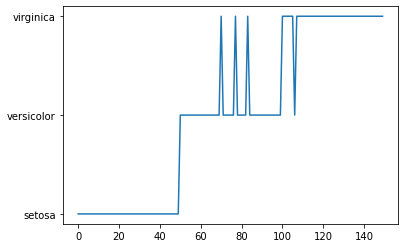

In [74]:
plt.plot(y_pred)
plt.yticks([0,1,2], ['setosa', 'versicolor', 'virginica'])

In [75]:
prob = model.predict_proba(X)
prob

array([[9.81784372e-01, 1.82156139e-02, 1.43263055e-08],
       [9.71695385e-01, 2.83045847e-02, 2.99722563e-08],
       [9.85437924e-01, 1.45620642e-02, 1.22390690e-08],
       [9.76283458e-01, 2.37165031e-02, 3.94477018e-08],
       [9.85377084e-01, 1.46229041e-02, 1.18581267e-08],
       [9.70448954e-01, 2.95509727e-02, 7.30136213e-08],
       [9.86883088e-01, 1.31168918e-02, 1.98305765e-08],
       [9.76384869e-01, 2.36151039e-02, 2.74412909e-08],
       [9.79830789e-01, 2.01691805e-02, 3.04750123e-08],
       [9.69110253e-01, 3.08897151e-02, 3.14428143e-08],
       [9.76485853e-01, 2.35141277e-02, 1.90891757e-08],
       [9.75402109e-01, 2.45978478e-02, 4.35439808e-08],
       [9.74537509e-01, 2.54624700e-02, 2.13446809e-08],
       [9.91966752e-01, 8.03324402e-03, 3.86592700e-09],
       [9.88186563e-01, 1.18134340e-02, 2.78813699e-09],
       [9.86764755e-01, 1.32352322e-02, 1.26940807e-08],
       [9.88102880e-01, 1.18971112e-02, 9.13247136e-09],
       [9.81538687e-01, 1.84612

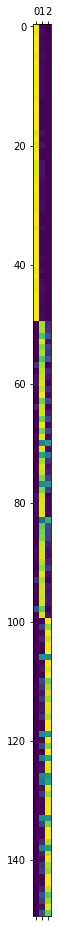

In [76]:
plt.matshow(prob, vmin=0, vmax=1)

In [77]:
prob.argmax(axis=1) # y_pred 와 같음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### 학습/테스트 데이터 분리

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target) # shuffle=True
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [82]:
y_train

array([1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0,
       0, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2])

In [83]:
y_test

array([2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2])

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
model.score(X_train, y_train)

0.9732142857142857

In [81]:
model.score(X_test, y_test)

0.9473684210526315

### sigmoid 함수
- Logistic 함수라고도 부른다
- 입력값을 0-1 사이의 확률값으로 바꿔준다

Text(0, 0.5, '출력값')

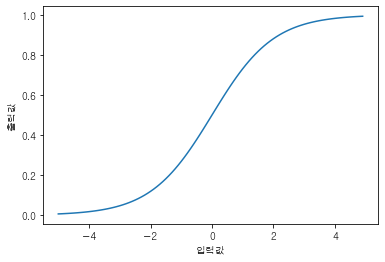

In [12]:
xs = np.arange(-5, 5, 0.1)
ys = 1/(1 + np.exp(-xs))

plt.rcParams['font.family'] = 'gulim' # 'Malgun Gothic'
plt.plot(xs, ys)
plt.xlabel('입력값')
plt.ylabel('출력값')

In [13]:
def sigmoid(t):
    return 1/(1 + np.exp(-t))

In [16]:
sigmoid(0), sigmoid(-10), sigmoid(10)

(0.5, 4.5397868702434395e-05, 0.9999546021312976)

> $ \hat{y} = sigmoid(w_1 x_1 + w_2 x_2 + b) $

### 로지스틱회귀의 경계선이 직선인 이유
- 로지스틱회귀는 선형회귀의 출력값에 sigmoid 함수를 적용한 것임 (가중치 w 와 절편값 b를 가짐)
- 경계는 확률이 0.5가 되는 지점, 즉 선형회귀의 출력값이 0이 되는 지점임
> $ w_1 x_1 + w_2 x_2 + b = 0 $

### 오차 계산방법
- 이진분류에서 로지스틱회귀는 **binary crossentropy** 를 사용한다
> $ error = -y\ log(\hat{y}) - (1-y)\ log(1-\hat{y}),\; y=0\ or\ 1$
- 목표값이 0 인데 예측값이 1에 가깝거나, 1 인데 예측값이 0에 가까우면 오차가 무한대로 커진다
- 다중분류에서는 **softmax** 함수와 **categorical crossentropy**를 사용한다
- 오차를 줄이기 위해, 신경망에서와 같이 **경사하강법**을 사용한다
> 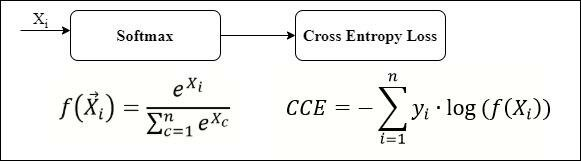

### 로지스틱회귀를 회귀라 부르는 이유
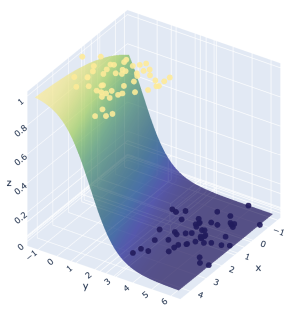
- 속성이 2개인 이진분류에서, z축을 목표값으로 놓으면 모든 데이터를 가장 잘 이어주는 sigmoid 평면을 찾는 것임